# Sect 20 (v2.1): Extensions to Linear Models

- online-ds-pt-100719
- 02/27/2020


## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss using dictionaries for scrubbing the whole df in a few lines of code. 
- Discuss polynomial regressions.
- Discuss the Bias vs Variance trade-off.



**APPLICATION:**
- Linear Regression with Boston Housing data set

## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- Bias-Variance Trade Off

In [1]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

pd.set_option('display.max_columns',0)
plt.style.use('seaborn-notebook')

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
def load_dataset():
    df = fs.datasets.load_boston()

    # Making example column
    data = ['?',1,2,3,4,np.nan,"N/A"]
    df['example'] = np.random.choice(data,len(df),replace=True)
    return df

df = load_dataset()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,N/A
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,N/A
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,?


# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

> - "Not accounting for them might lead to results that are wrong."

> - You'll also notice that including them when they're needed will increase your $R^2$ value!


- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- One way of addessing multicollinearity is to replace 2 multicollinear columns with the interaction term.

### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## Using seaborn to view interactions

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- ~~`sns.factorplot`~~
- `sns.catplot`
- `sns.FacetGrid`

### Ex Interaction: Not very different

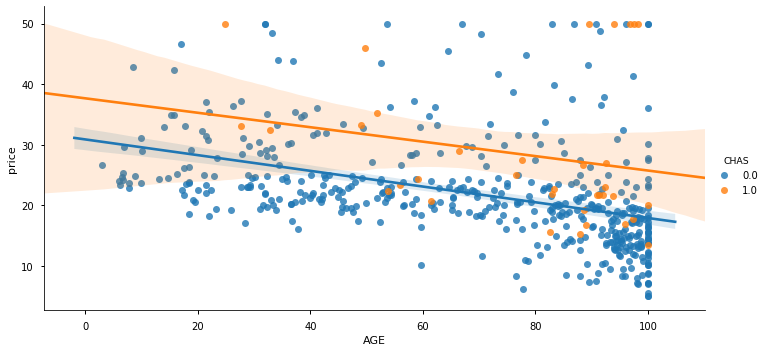

In [3]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'AGE','price')
g.add_legend()

### Ex Interaction: different

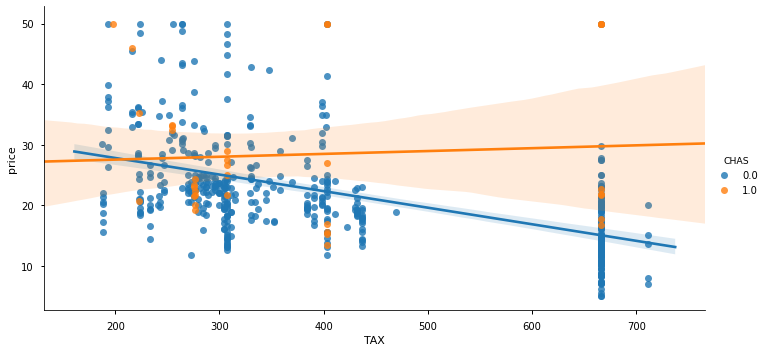

In [4]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'TAX','price')
g.add_legend()

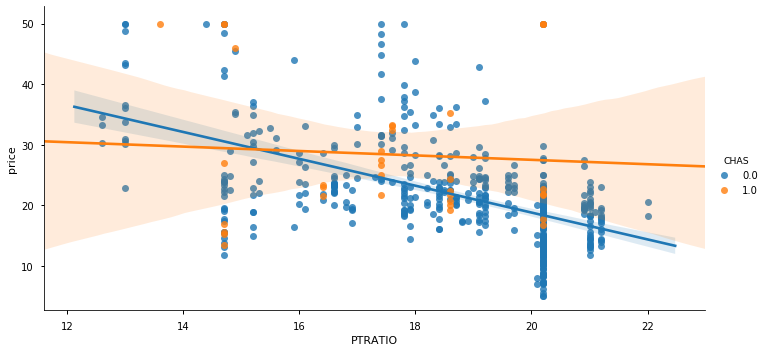

In [5]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'PTRATIO','price')
g.add_legend()

# High-Level Programmatic Scrubbing with `pandas_profiling` and dictionaries

#### OSEMN
1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check dtypes, preview
    - Drop unneeded columns

2. **[SCRUB](#SCRUB)**
    - Recast data types
    - Find and deal with weird/placeholder values
    - Check for and Address null values
    - Identify (& remove) outliers
    - Check for multicollinearity
    - Normalize/standardize data (depending on type of model)
    

         
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
    - [ ] Use scatter plots to check for linearity and possible categorical variables 
    - [ ] Check for linear relationships (if required by model).
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

### Quick EDA/Srubbing with `pandas_profiling` and dictionaries.

- When we know what we must address, we can use advanced tool and loops/dictionaries to do all scrubbing in a few lines of code3

- [Speed Up Your Exploratory Data Analysis With Pandas-Profiling](https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625)

```python
from pandas_profiling import ProfileReport
ProfileReport(df)```

In [6]:
# df = load_dataset()
# df.head()

In [7]:
from pandas_profiling import ProfileReport
ProfileReport(df)

2. **[SCRUB](#SCRUB)**
    - Recast data types
    - Find and deal with weird/placeholder values
    - Check for and Address null values
    - Identify (& remove) outliers
    - Check for multicollinearity
    - Normalize/standardize data (depending on type of model)
    

In [8]:
## Drop unneeded cols
drop_cols = []
[df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,N/A
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,N/A
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,?


In [9]:
## Find and deal with weird/placeholder values
display(df['example'].value_counts())
print(f"# Null values: {df['example'].isna().sum()}")

1      84
N/A    83
2      78
?      70
3      69
4      64
nan    58
Name: example, dtype: int64

# Null values: 0


In [10]:
## Replacing Values
repl_dict = {'example':
             {'?':0, 'N/A':np.nan,'nan':0 }
            }
             
for col,replace_vals in repl_dict.items():
    df[col] = df[col].replace(replace_vals)

In [11]:
df['example'].isna().sum(),df['example'].value_counts()

(83, 0    128
 1     84
 2     78
 3     69
 4     64
 Name: example, dtype: int64)

In [12]:
## Fill Null values / zeros
fillna_dict = {'example':0}
for col,val in fillna_dict.items():
    df[col] = df[col].fillna(val)
    
    
df['example'].value_counts(dropna=False)

0    211
1     84
2     78
3     69
4     64
Name: example, dtype: int64

In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example     object
dtype: object

In [14]:
## Recasting datatypes
recast_dict = {'CHAS':int, 'example':int}

for col,dtype in recast_dict.items():
    df[col] = df[col].astype(dtype)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

In [15]:
display(df.head(), df.dtypes, df.isna().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
example    0
dtype: int64

In [16]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,3
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,3


In [17]:
## we can wrap everything we did above in 1 function
def scrub_df(data,drop_cols =[],#['id','date','view'],
                       repl_dict = {},#{'sqft_basement':('?','0.0')},
                       recast_dict = {},#{'sqft_basement':'float'},
                       fillna_dict = {},#{'waterfront':0,'yr_renovated':0},
                      verbose=1):
    """
    Performs scrubbing process on the df in the following order:
    1. Drop cols in the drop_cols list
    2. Replace values using repl_dict
    3. Recast dtypes using recast_dict
    4. Fillna using fillna_dict
    
    Args:
        data (Frame):
        drop_cols (list):
        repl_dict (dict): Key=column name, 
                            value= dict of {to_replace:replace_with}
        recast_dict(dict): 
        fillna_dict(dict): key = column name,
                            val = value to fill with or function to apply 
    """
    import copy
    df = copy.deepcopy(data)#.copy()
    
    ## Drop cols
    drop_cols = []
    [df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]


    ## Replacing Values
    for col,replace_vals in repl_dict.items():
            df[col] = df[col].replace(replace_vals)


    
    ## Fill Null values / zeros
    for col,val in fillna_dict.items():
        import types
        if isinstance(val, types.FunctionType):
            fill_val = val(df[col])
        else:
            fill_val = val
        
        df[col].fillna(fill_val,inplace=True)
 
    ## Recasting datatypes
    for col,dtype in recast_dict.items():
        df[col] = df[col].astype(dtype)
    df.dtypes
    
    ## display preview
    if verbose>0:
        display(df.head())
    if verbose>1:
        display(df.info())

    return df
    

In [18]:
df = load_dataset()
df = scrub_df(df,drop_cols=drop_cols,repl_dict=repl_dict, 
              recast_dict=recast_dict,fillna_dict=fillna_dict)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [19]:
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533,1.433
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197,1.544
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000,0.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025,0.000
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200,1.000
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000,3.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000,4.000


In [20]:
display(df.head(), df.dtypes, df.isna().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
example    0
dtype: int64

In [21]:
df.select_dtypes('int').columns

Index(['CHAS', 'example'], dtype='object')

In [22]:
## Get lists of categorical vs numeric columns
target = 'price'

## Scale non-categorical columns
cat_cols = list(df.select_dtypes('int').columns)

num_cols = list(df.drop(columns=target).select_dtypes(include=['number'],
                           exclude=['int']).columns)

cat_cols,num_cols

(['CHAS', 'example'],
 ['CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [23]:
## Scale data
from sklearn.preprocessing import scale,StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,0
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,4
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,3
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,1


In [24]:
# deal with outliers in numeric non-target columns
ignore_cols = ['price',*cat_cols]
[num_cols.remove(col) for col in ignore_cols if col in num_cols]
num_cols

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [25]:
## Find outliers
df_outs = pd.DataFrame()

for col in num_cols:
    
    idx_outs = fs.find_outliers_Z(df[col])
    df_outs[col] = idx_outs

out_rows = df_outs.any(axis=1)

print(f"There are {out_rows.sum()} rows with outliers out of {len(df_outs)} rows.")

print(df_outs.sum())

There are 58 rows with outliers out of 506 rows.
CRIM        8
ZN         14
INDUS       0
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       5
dtype: int64


In [26]:
## Remove outliers
df = df[~out_rows].reset_index(drop=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,0
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,4
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,3
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,1


In [27]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf


def make_ols_f(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")

    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model

    
def diagnose_model(model):
    """
    Plot Q-Q plot and model residuals from statsmodels ols model.
    
    Args:
        model (smf.ols model): statsmodels formula ols 
    
    Returns:
        fig, ax: matplotlib objects
    """
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    
    return fig,ax 

In [28]:
cat_cols

['CHAS', 'example']

## Making a baseline model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     69.69
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          7.24e-112
Time:                        17:55:28   Log-Likelihood:                -1297.0
No. Observations:                 448   AIC:                             2630.
Df Residuals:                     430   BIC:                             2704.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.9556      0.333     65.873      0.000      21.300      22.611
C(CHAS)[T.1]        3.2146      0.847      3.797      0.000       1.550       4.879
C(example)[T.1]    -0.2847      0.634     -0.449      0.654      -1.531       0.962
C(example)[T.2]    -0.0509      0.742     -0.069      0.945      -1.509       1.407
C(example)[T.3]    -0.0444      0.657     -0.068      0.946      -1.336       1.247
C(example)[T.4]     0.7504      0.624      1.203      0.230      -0.476       1.977
CRIM               -1.1496      0.687     -1.673      0.095      -2.500       0.201
ZN                  0.1513      0.359      0.421      0.674      -0.555       0.858
INDUS               0.2865      0.407      0.704      0.482      -0.513       1.086
NOX                -1.7445      0.447     -3.900      0.000      -2.624      -0.865
RM                  3.4357      0.344      9.974      0.000       2.759       4.113
AGE                -0.3274      0.368     -0.890      0.374      -1.050       0.395
DIS                -2.6669      0.440     -6.067      0.000      -3.531      -1.803
RAD                 2.3237      0.625      3.715      0.000       1.094       3.553
TAX                -1.7198      0.625     -2.750      0.006      -2.949      -0.491
PTRATIO            -1.9198      0.281     -6.840      0.000      -2.472      -1.368
B                   0.6814      0.412      1.654      0.099      -0.128       1.491
LSTAT              -3.6759      0.411     -8.944      0.000      -4.484      -2.868
==============================================================================
Omnibus:                      211.424   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1506.800
Skew:                           1.903   Prob(JB):                         0.00
Kurtosis:                      11.138   Cond. No.                         9.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

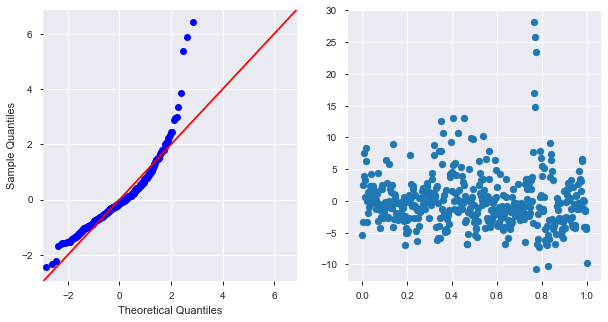

In [29]:
model = make_ols_f(df,target='price',cat_cols=cat_cols)

In [30]:
## Get p-values
def get_model_params(model):
    coeffs =pd.DataFrame({'p-value':model.pvalues,
                          'coeff':model.params,
                         'sig':model.pvalues<.05}).round(4)
    return coeffs
coeffs = get_model_params(model)
coeffs

,p-value,coeff,sig
Intercept,0.0000,21.9556,True
C(CHAS)[T.1],0.0002,3.2146,True
C(example)[T.1],0.6538,-0.2847,False
C(example)[T.2],0.9453,-0.0509,False
C(example)[T.3],0.9461,-0.0444,False
C(example)[T.4],0.2297,0.7504,False
CRIM,0.0950,-1.1496,False
ZN,0.6740,0.1513,False
INDUS,0.4817,0.2865,False
NOX,0.0001,-1.7445,True


In [31]:
## get list of cols to exclude
coeffs.query('sig == False')#.index


,p-value,coeff,sig
C(example)[T.1],0.6538,-0.2847,False
C(example)[T.2],0.9453,-0.0509,False
C(example)[T.3],0.9461,-0.0444,False
C(example)[T.4],0.2297,0.7504,False
CRIM,0.0950,-1.1496,False
ZN,0.6740,0.1513,False
INDUS,0.4817,0.2865,False
AGE,0.3737,-0.3274,False
B,0.0989,0.6814,False


In [32]:
best_model_kws = dict(target='price',cat_cols=cat_cols,exclude_cols=[
    'example','ZN','CRIM','INDUS','AGE',],return_formula=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.69e-118
Time:                        17:55:28   Log-Likelihood:                -1300.3
No. Observations:                 448   AIC:                             2621.
Df Residuals:                     438   BIC:                             2662.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.1052      0.232     95.471      0.000      21.650      22.560
C(CHAS)[T.1]     3.3054      0.827      3.996      0.000       1.680       4.931
NOX             -1.7428      0.416     -4.194      0.000      -2.560      -0.926
RM               3.3827      0.325     10.401      0.000       2.744       4.022
DIS             -2.4816      0.368     -6.738      0.000      -3.205      -1.758
RAD              1.7233      0.521      3.308      0.001       0.699       2.747
TAX             -1.4657      0.546     -2.685      0.008      -2.539      -0.393
PTRATIO         -1.9212      0.261     -7.373      0.000      -2.433      -1.409
B                0.6923      0.405      1.710      0.088      -0.104       1.488
LSTAT           -3.9654      0.361    -10.971      0.000      -4.676      -3.255
==============================================================================
Omnibus:                      200.598   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.650
Skew:                           1.790   Prob(JB):                    3.19e-304
Kurtosis:                      10.877   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

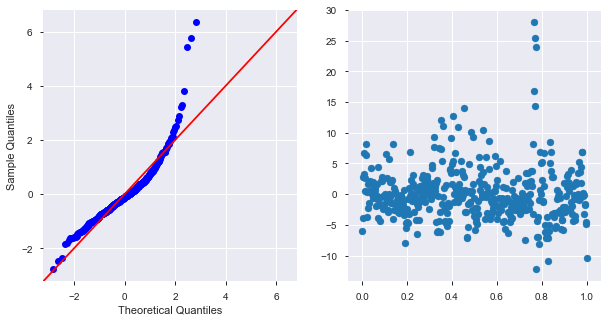

In [33]:
model= make_ols_f(df,**best_model_kws)#target='price',cat_cols=cat_cols,exclude_cols=[
#     'example','ZN','CRIM','INDUS','AGE',])

## Interactions Effect On Model

In [34]:
pd.set_option('display.max_rows',999)
best_model_kws

{'target': 'price',
 'cat_cols': ['CHAS', 'example'],
 'exclude_cols': ['example', 'ZN', 'CRIM', 'INDUS', 'AGE'],
 'return_formula': True}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.69e-118
Time:                        17:55:28   Log-Likelihood:                -1300.3
No. Observations:                 448   AIC:                             2621.
Df Residuals:                     438   BIC:                             2662.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.1052      0.232     95.471      0.000      21.650      22.560
C(CHAS)[T.1]     3.3054      0.827      3.996      0.000       1.680       4.931
NOX             -1.7428      0.416     -4.194      0.000      -2.560      -0.926
RM               3.3827      0.325     10.401      0.000       2.744       4.022
DIS             -2.4816      0.368     -6.738      0.000      -3.205      -1.758
RAD              1.7233      0.521      3.308      0.001       0.699       2.747
TAX             -1.4657      0.546     -2.685      0.008      -2.539      -0.393
PTRATIO         -1.9212      0.261     -7.373      0.000      -2.433      -1.409
B                0.6923      0.405      1.710      0.088      -0.104       1.488
LSTAT           -3.9654      0.361    -10.971      0.000      -4.676      -3.255
==============================================================================
Omnibus:                      200.598   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.650
Skew:                           1.790   Prob(JB):                    3.19e-304
Kurtosis:                      10.877   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

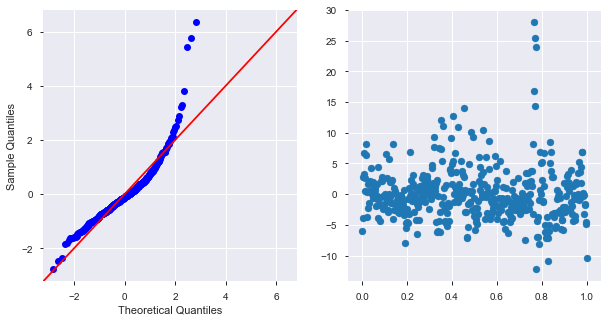

price~C(CHAS)+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT


In [35]:
## Running our baseline model
model,form = make_ols_f(df,**best_model_kws)
print(form)

### Adding interaction terms

In [36]:
exclude_cols = best_model_kws['exclude_cols']
exclude_cols


['example', 'ZN', 'CRIM', 'INDUS', 'AGE']

In [37]:
target= 'price'
ixn_cols=[('CHAS','LSTAT')]
col_list = list(df.drop(target,axis=1).columns)
## remove exclude cols
[col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]


[None, None, None, None, None]

In [38]:
## ADDDING INTERACTION TERMS    
# if len(ixn_cols)>0:
for ixn in ixn_cols:
    ixn_term=f"{ixn[0]}*{ixn[1]}"
    col_list.append(ixn_term) #= features + ixn_term
col_list

['CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CHAS*LSTAT']

In [39]:
features = ' + '.join(col_list)
features

for col in cat_cols:
    features = features.replace(col,f"C({col})")

features

'C(CHAS) + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)*LSTAT'

In [40]:
## MAKE FULL FORMULA
formula = target+'~'+features #target~predictors
print(formula)

price~C(CHAS) + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)*LSTAT


In [41]:
## Fit model
model = smf.ols(formula=formula, data=df).fit()
model.summary()
## Display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.02e-118
Time:                        17:55:29   Log-Likelihood:                -1297.2
No. Observations:                 448   AIC:                             2616.
Df Residuals:                     437   BIC:                             2662.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.0988      0.230     95.984      0.000      21.646      22.551
C(CHAS)[T.1]           3.0226      0.831      3.639      0.000       1.390       4.655
NOX                   -1.6925      0.414     -4.091      0.000      -2.506      -0.879
RM                     3.3168      0.324     10.222      0.000       2.679       3.955
DIS                   -2.4146      0.367     -6.575      0.000      -3.136      -1.693
RAD                    1.7389      0.518      3.357      0.001       0.721       2.757
TAX                   -1.5779      0.545     -2.897      0.004      -2.648      -0.507
PTRATIO               -1.9380      0.259     -7.477      0.000      -2.447      -1.429
B                      0.7352      0.403      1.824      0.069      -0.057       1.527
LSTAT                 -3.7773      0.367    -10.280      0.000      -4.500      -3.055
C(CHAS)[T.1]:LSTAT    -2.2037      0.897     -2.457      0.014      -3.967      -0.441
==============================================================================
Omnibus:                      199.113   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.890
Skew:                           1.764   Prob(JB):                    1.74e-309
Kurtosis:                      10.983   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
def make_ols_f_ixn(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [], ixn_cols=[],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        ixn_cols ()
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]
    
    ## ADDDING INTERACTION TERMS    
    if len(ixn_cols)>0:
        for ixn in ixn_cols:
            ixn_term=f"{ixn[0]}*{ixn[1]}"
            col_list.append(ixn_term) #= features + ixn_term
        
        
    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")


        
    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model
    
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          1.02e-118
Time:                        17:55:29   Log-Likelihood:                -1297.2
No. Observations:                 448   AIC:                             2616.
Df Residuals:                     437   BIC:                             2662.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.0988      0.230     95.984      0.000      21.646      22.551
C(CHAS)[T.1]           3.0226      0.831      3.639      0.000       1.390       4.655
NOX                   -1.6925      0.414     -4.091      0.000      -2.506      -0.879
RM                     3.3168      0.324     10.222      0.000       2.679       3.955
DIS                   -2.4146      0.367     -6.575      0.000      -3.136      -1.693
RAD                    1.7389      0.518      3.357      0.001       0.721       2.757
TAX                   -1.5779      0.545     -2.897      0.004      -2.648      -0.507
PTRATIO               -1.9380      0.259     -7.477      0.000      -2.447      -1.429
B                      0.7352      0.403      1.824      0.069      -0.057       1.527
LSTAT                 -3.7773      0.367    -10.280      0.000      -4.500      -3.055
C(CHAS)[T.1]:LSTAT    -2.2037      0.897     -2.457      0.014      -3.967      -0.441
==============================================================================
Omnibus:                      199.113   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.890
Skew:                           1.764   Prob(JB):                    1.74e-309
Kurtosis:                      10.983   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

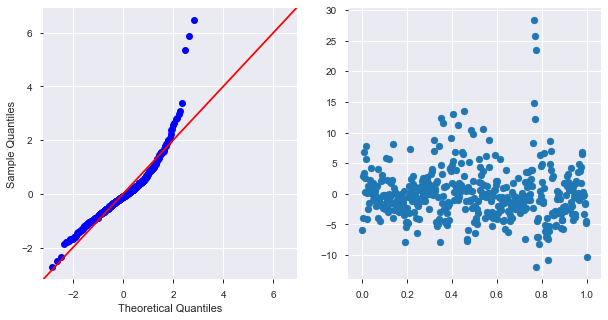

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c2b7b1e10>,
 'price~C(CHAS)+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT+C(CHAS)*LSTAT')

In [43]:
make_ols_f_ixn(df,ixn_cols=ixn_cols,**best_model_kws)

## Testing all possible interactions

In [44]:
import itertools
make_combs = df.drop(columns=['price',*best_model_kws['exclude_cols']]).columns
col_pairs  = list(itertools.combinations(make_combs,2))
col_pairs[:5]

[('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX')]

In [45]:
best_model_kws['ixn_cols']=col_pairs
best_model_kws

{'target': 'price',
 'cat_cols': ['CHAS', 'example'],
 'exclude_cols': ['example', 'ZN', 'CRIM', 'INDUS', 'AGE'],
 'return_formula': True,
 'ixn_cols': [('CHAS', 'NOX'),
  ('CHAS', 'RM'),
  ('CHAS', 'DIS'),
  ('CHAS', 'RAD'),
  ('CHAS', 'TAX'),
  ('CHAS', 'PTRATIO'),
  ('CHAS', 'B'),
  ('CHAS', 'LSTAT'),
  ('NOX', 'RM'),
  ('NOX', 'DIS'),
  ('NOX', 'RAD'),
  ('NOX', 'TAX'),
  ('NOX', 'PTRATIO'),
  ('NOX', 'B'),
  ('NOX', 'LSTAT'),
  ('RM', 'DIS'),
  ('RM', 'RAD'),
  ('RM', 'TAX'),
  ('RM', 'PTRATIO'),
  ('RM', 'B'),
  ('RM', 'LSTAT'),
  ('DIS', 'RAD'),
  ('DIS', 'TAX'),
  ('DIS', 'PTRATIO'),
  ('DIS', 'B'),
  ('DIS', 'LSTAT'),
  ('RAD', 'TAX'),
  ('RAD', 'PTRATIO'),
  ('RAD', 'B'),
  ('RAD', 'LSTAT'),
  ('TAX', 'PTRATIO'),
  ('TAX', 'B'),
  ('TAX', 'LSTAT'),
  ('PTRATIO', 'B'),
  ('PTRATIO', 'LSTAT'),
  ('B', 'LSTAT')]}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     59.22
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          9.27e-150
Time:                        17:55:29   Log-Likelihood:                -1138.2
No. Observations:                 448   AIC:                             2368.
Df Residuals:                     402   BIC:                             2557.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.6331      0.597     34.535      0.000      19.459      21.808
C(CHAS)[T.1]             3.1507      1.719      1.833      0.067      -0.228       6.529
NOX                     -2.5417      0.532     -4.775      0.000      -3.588      -1.495
C(CHAS)[T.1]:NOX        -3.7707      1.590     -2.372      0.018      -6.896      -0.646
RM                       3.2366      0.316     10.241      0.000       2.615       3.858
C(CHAS)[T.1]:RM         -1.2884      1.037     -1.243      0.215      -3.326       0.749
DIS                     -4.1777      0.674     -6.196      0.000      -5.503      -2.852
C(CHAS)[T.1]:DIS        -1.0109      2.761     -0.366      0.714      -6.438       4.416
RAD                      1.5786      0.960      1.645      0.101      -0.308       3.466
C(CHAS)[T.1]:RAD        -2.9156      3.598     -0.810      0.418      -9.988       4.157
TAX                     -2.3674      1.037     -2.282      0.023      -4.407      -0.328
C(CHAS)[T.1]:TAX         7.8924      4.649      1.698      0.090      -1.247      17.032
PTRATIO                 -0.8874      0.912     -0.973      0.331      -2.679       0.905
C(CHAS)[T.1]:PTRATIO    -0.5421      1.748     -0.310      0.757      -3.979       2.895
B                        0.9070      0.796      1.140      0.255      -0.657       2.471
C(CHAS)[T.1]:B           0.6274      1.509      0.416      0.678      -2.340       3.595
LSTAT                   -4.2474      0.394    -10.792      0.000      -5.021      -3.474
C(CHAS)[T.1]:LSTAT      -0.4669      1.265     -0.369      0.712      -2.954       2.020
NOX:RM                  -0.0391      0.528     -0.074      0.941      -1.076       0.998
NOX:DIS                 -0.4961      0.537     -0.924      0.356      -1.551       0.559
NOX:RAD                 -3.1609      1.199     -2.637      0.009      -5.517      -0.805
NOX:TAX                  2.7511      1.245      2.210      0.028       0.304       5.199
NOX:PTRATIO              0.1392      0.538      0.259      0.796      -0.918       1.197
NOX:B                    0.3209      0.543      0.591      0.555      -0.747       1.388
NOX:LSTAT               -0.1825      0.523     -0.349      0.727      -1.211       0.846
RM:DIS                   0.6926      0.412      1.681      0.093      -0.117       1.502
RM:RAD                  -0.9035      0.809     -1.116      0.265      -2.494       0.687
RM:TAX                  -0.2107      0.852     -0.247      0.805      -1.885       1.464
RM:PTRATIO              -0.9320      0.304     -3.062      0.002      -1.530      -0.334
RM:B                    -1.4703      0.537     -2.738      0.006      -2.526      -0.415
RM:LSTAT                -1.7505      0.281     -6.234      0.000      -2.303      -1.198
DIS:RAD                 -3.3600      0.964     -3.487    

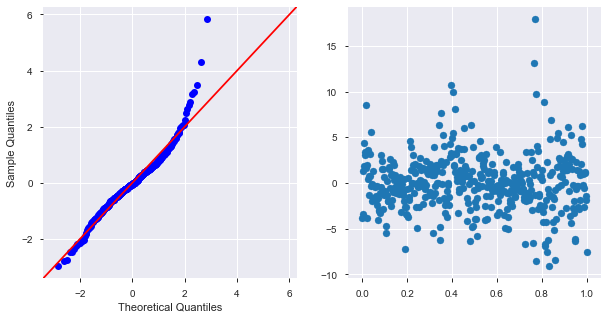

In [46]:
model,f = make_ols_f_ixn(df,**best_model_kws,)

In [47]:
## Examing p-values to find sig interactions
params= get_model_params(model).sort_index()
params.loc[params['sig']==True]

,p-value,coeff,sig
C(CHAS)[T.1]:NOX,0.0182,-3.7707,True
DIS,0.0000,-4.1777,True
DIS:RAD,0.0005,-3.3600,True
Intercept,0.0000,20.6331,True
LSTAT,0.0000,-4.2474,True
NOX,0.0000,-2.5417,True
NOX:RAD,0.0087,-3.1609,True
NOX:TAX,0.0277,2.7511,True
RM,0.0000,3.2366,True
RM:B,0.0064,-1.4703,True


In [48]:
## pandas stlying to make it easier to digest
params.style.applymap(lambda x: 'color:red' if x >.05 else 'color:green',
                     subset=['p-value'])#

,p-value,coeff,sig
B,0.255,0.907,False
B:LSTAT,0.0768,-0.9648,False
C(CHAS)[T.1],0.0675,3.1507,False
C(CHAS)[T.1]:B,0.6779,0.6274,False
C(CHAS)[T.1]:DIS,0.7144,-1.0109,False
C(CHAS)[T.1]:LSTAT,0.7122,-0.4669,False
C(CHAS)[T.1]:NOX,0.0182,-3.7707,True
C(CHAS)[T.1]:PTRATIO,0.7566,-0.5421,False
C(CHAS)[T.1]:RAD,0.4182,-2.9156,False
C(CHAS)[T.1]:RM,0.2146,-1.2884,False


In [49]:
good_ixn = params.loc[params['sig']==True].sort_index()
good_ixn

,p-value,coeff,sig
C(CHAS)[T.1]:NOX,0.0182,-3.7707,True
DIS,0.0000,-4.1777,True
DIS:RAD,0.0005,-3.3600,True
Intercept,0.0000,20.6331,True
LSTAT,0.0000,-4.2474,True
NOX,0.0000,-2.5417,True
NOX:RAD,0.0087,-3.1609,True
NOX:TAX,0.0277,2.7511,True
RM,0.0000,3.2366,True
RM:B,0.0064,-1.4703,True


In [50]:
## Get column names of significant interaction terms
ixn_cols = [col for col in good_ixn.index if ":" in col]
ixn_cols

['C(CHAS)[T.1]:NOX',
 'DIS:RAD',
 'NOX:RAD',
 'NOX:TAX',
 'RM:B',
 'RM:LSTAT',
 'RM:PTRATIO']

In [51]:
ixn_cols = list(map(lambda x: x.split(':'),ixn_cols))
ixn_cols

[['C(CHAS)[T.1]', 'NOX'],
 ['DIS', 'RAD'],
 ['NOX', 'RAD'],
 ['NOX', 'TAX'],
 ['RM', 'B'],
 ['RM', 'LSTAT'],
 ['RM', 'PTRATIO']]

In [52]:
ixn_cols[0] = ['CHAS','NOX']
ixn_cols

[['CHAS', 'NOX'],
 ['DIS', 'RAD'],
 ['NOX', 'RAD'],
 ['NOX', 'TAX'],
 ['RM', 'B'],
 ['RM', 'LSTAT'],
 ['RM', 'PTRATIO']]

In [53]:
best_model_kws['ixn_cols'] = ixn_cols
best_model_kws

{'target': 'price',
 'cat_cols': ['CHAS', 'example'],
 'exclude_cols': ['example', 'ZN', 'CRIM', 'INDUS', 'AGE'],
 'return_formula': True,
 'ixn_cols': [['CHAS', 'NOX'],
  ['DIS', 'RAD'],
  ['NOX', 'RAD'],
  ['NOX', 'TAX'],
  ['RM', 'B'],
  ['RM', 'LSTAT'],
  ['RM', 'PTRATIO']]}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          2.23e-136
Time:                        17:55:29   Log-Likelihood:                -1240.0
No. Observations:                 448   AIC:                             2514.
Df Residuals:                     431   BIC:                             2584.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.9504      0.348     60.229      0.000      20.267      21.634
C(CHAS)[T.1]         3.0421      0.759      4.007      0.000       1.550       4.534
NOX                 -1.4980      0.430     -3.482      0.001      -2.344      -0.652
C(CHAS)[T.1]:NOX     0.1071      0.624      0.172      0.864      -1.120       1.334
RM                   2.3741      0.317      7.498      0.000       1.752       2.996
DIS                 -2.7408      0.420     -6.533      0.000      -3.565      -1.916
RAD                  1.8758      0.556      3.376      0.001       0.784       2.968
TAX                 -1.8260      0.491     -3.722      0.000      -2.790      -0.862
PTRATIO             -1.1343      0.243     -4.670      0.000      -1.612      -0.657
B                    0.4057      0.399      1.016      0.310      -0.379       1.191
LSTAT               -5.4166      0.365    -14.833      0.000      -6.134      -4.699
DIS:RAD             -1.9116      0.552     -3.466      0.001      -2.996      -0.827
NOX:RAD             -2.4599      0.722     -3.405      0.001      -3.880      -1.040
NOX:TAX              0.9609      0.755      1.272      0.204      -0.524       2.445
RM:B                -0.6157      0.510     -1.208      0.228      -1.618       0.386
RM:LSTAT            -1.7750      0.236     -7.531      0.000      -2.238      -1.312
RM:PTRATIO          -0.8831      0.220     -4.006      0.000      -1.316      -0.450
==============================================================================
Omnibus:                      199.746   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.401
Skew:                           1.716   Prob(JB):                         0.00
Kurtosis:                      11.757   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

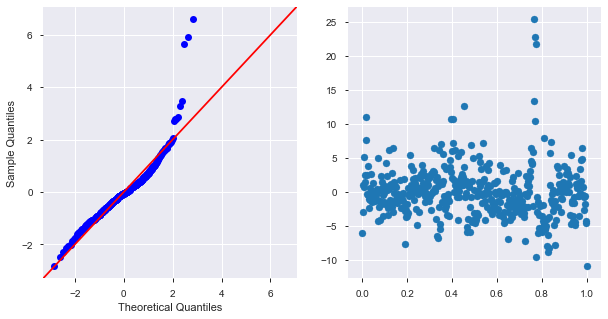

In [54]:
model = make_ols_f_ixn(df,**best_model_kws)

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [55]:
df = fs.datasets.load_yields(version='other')
display(df.head())

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


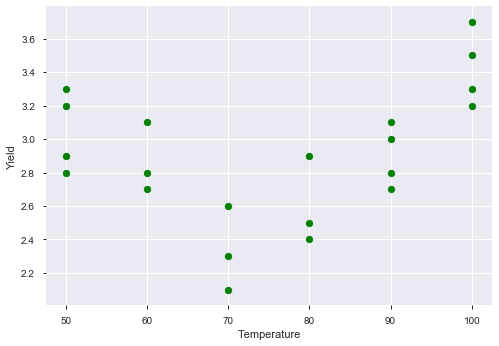

In [56]:
y = df['Yield']
X = df.drop(columns=['Yield'])


plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

$\large \hat y = \hat \beta_0 + \hat \beta_1x $ 

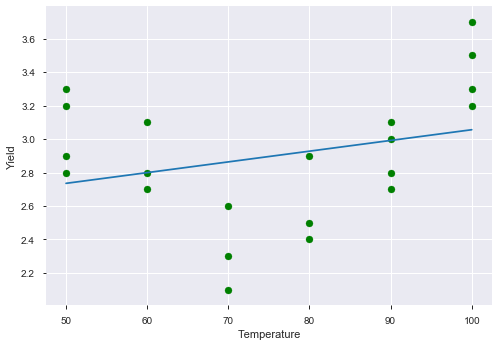

In [57]:
## Fit a simple linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');


In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = round(mean_squared_error(y, reg.predict(X)),3)
r2 = round(r2_score(y, reg.predict(X)),3)
print(f"MSE = {mse}")
print(f"R2 = {r2}")

MSE = 0.139
R2 = 0.086


### A quadratic relationship
$\large \hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

In [59]:
X['Temp_sq'] = X['Temp']**2
X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


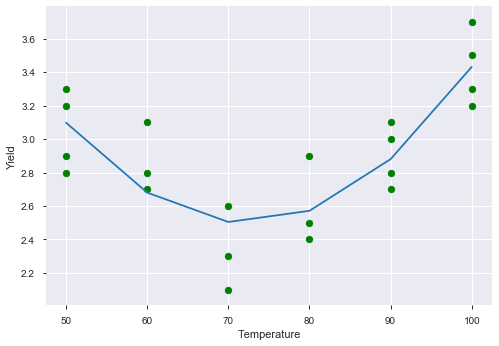

In [60]:
reg_q = LinearRegression().fit(X, y)
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [61]:
mse = round(mean_squared_error(y, reg_q.predict(X)),3)
r2 = round(r2_score(y, reg_q.predict(X)),3)
print(f"MSE = {mse}")
print(f"R2 = {r2}")

MSE = 0.047
R2 = 0.695


Adding higher-order polynomials
$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

In [62]:
transform_col='Temp'
target_col='Yield'


y = df[target_col].copy()

X = df.drop(columns=[target_col])

display(X.head(),y.head())

,Temp
i,
1,50
2,50
3,50
4,50
5,60


i
1    3.3
2    2.8
3    2.9
4    3.2
5    2.7
Name: Yield, dtype: float64

In [63]:
from sklearn.preprocessing import PolynomialFeatures
n_poly = 5
polyfeat = PolynomialFeatures(n_poly)

In [64]:
X_poly = polyfeat.fit_transform(df[["Temp"]])
X_poly

array([[1.0000e+00, 5.0000e+01, 2.5000e+03, 1.2500e+05, 6.2500e+06,
        3.1250e+08],
       [1.0000e+00, 5.0000e+01, 2.5000e+03, 1.2500e+05, 6.2500e+06,
        3.1250e+08],
       [1.0000e+00, 5.0000e+01, 2.5000e+03, 1.2500e+05, 6.2500e+06,
        3.1250e+08],
       [1.0000e+00, 5.0000e+01, 2.5000e+03, 1.2500e+05, 6.2500e+06,
        3.1250e+08],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05, 1.2960e+07,
        7.7760e+08],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05, 1.2960e+07,
        7.7760e+08],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05, 1.2960e+07,
        7.7760e+08],
       [1.0000e+00, 7.0000e+01, 4.9000e+03, 3.4300e+05, 2.4010e+07,
        1.6807e+09],
       [1.0000e+00, 7.0000e+01, 4.9000e+03, 3.4300e+05, 2.4010e+07,
        1.6807e+09],
       [1.0000e+00, 7.0000e+01, 4.9000e+03, 3.4300e+05, 2.4010e+07,
        1.6807e+09],
       [1.0000e+00, 8.0000e+01, 6.4000e+03, 5.1200e+05, 4.0960e+07,
        3.2768e+09],
       [1.0000e+00, 8

In [65]:
col_names = [f"{'Temp'}^{i}" for i in range(n_poly+1)]
             
df_poly = pd.DataFrame(X_poly,columns=col_names)
df_poly[target_col] = df[target_col].copy()
df_poly.dropna(inplace=True)
df_poly

,Temp^0,Temp^1,Temp^2,Temp^3,Temp^4,Temp^5,Yield
1,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,3.3
2,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,2.8
3,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,2.9
4,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,3.2
5,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,2.7
6,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,3.1
7,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,2.8
8,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,2.6
9,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,2.1
10,1.0,80.0,6400.0,512000.0,40960000.0,3.276800e+09,2.3


In [66]:
from sklearn.preprocessing import PolynomialFeatures

n_poly = 5
def get_poly_features(df,transform_col='Temp',target_col='Yield',
                     n_poly=5):
    polyfeat = PolynomialFeatures(n_poly)
    col_names = [f'{transform_col}^{i}' for i in range(n_poly+1)]

    X_poly = polyfeat.fit_transform(df[[transform_col]])
    df_poly = pd.DataFrame(X_poly,columns=col_names)
    df_poly[target_col] = df[target_col].copy()
    df_poly.dropna(inplace=True)
    return df_poly

In [67]:
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def model_poly_data(df_poly,n_poly=5, fig_xcol='Temp^1',target_col='Yield'):

    X = df_poly.drop(columns=[target_col]).copy()
    y = df_poly[target_col].copy()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=123)
    poly_reg = LinearRegression()#normalize=True)
    poly_reg.fit(X_train,y_train)
    
    y_hat_train =  poly_reg.predict(X_train)
    y_hat_test =  poly_reg.predict(X_test)
    
    r2_train = r2_score(y_train, y_hat_train)
    r2_test = r2_score(y_test,y_hat_test)
    
    print(f'[i] For polynomial features = {n_poly}:')
    print(f"\tTraining R2: {round(r2_train,4)}")
    print(f"\tTest R2: {round(r2_test,4)}")
    
    fig,ax = plt.subplots()
    df_poly.plot(kind='scatter',x=fig_xcol,y=target_col,sizes=[50],ax=ax)
    ax.plot(df_poly[fig_xcol], poly_reg.predict(X))
    
    plot_r2 = r2_score(y, poly_reg.predict(X))
    ax.set_title(f"Predictions From Poly={n_poly}: R2={round(plot_r2,3)}")
#     plt.scatter(X_test[fig_xcol], y_test)
#     plt.plot(X_test[fig_xcol],y_hat_test)
    return {'train_test_split': [X_train,X_test,y_train,y_test],
           'preds': {'train':y_hat_train,
                    'test':y_hat_test}}


# # def plot_poly():
#     fig,ax = plt.subplots()
#     df_poly.plot(kind='scatter',x=orig_data_col,y=target_col,sizes=[50],ax=ax)
    
#     ax.plot(df_poly[orig_data_col], preds)
    
#     ax.set_title(f"Predictions From Poly={n_poly}: R2={round(r2,3)}")
#     return fig,ax

from ipywidgets import interact

@interact
def show_poly_results(N=(1,10)):
# N =3

    df_poly = get_poly_features(df,n_poly=N,transform_col='Temp',target_col='Yield',)
#     display(df_poly.head())

    res=model_poly_data(df_poly,n_poly=N)
    # plot_poly()

interactive(children=(IntSlider(value=5, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

[i] For polynomial features = 2:
	Training R2: 0.2138
	Test R2: 0.3606
[i] For polynomial features = 3:
	Training R2: 0.2341
	Test R2: 0.3566
[i] For polynomial features = 4:
	Training R2: 0.5102
	Test R2: 0.0891
[i] For polynomial features = 6:
	Training R2: 0.5292
	Test R2: -0.0037
[i] For polynomial features = 8:
	Training R2: 0.5292
	Test R2: -0.0037
[i] For polynomial features = 10:
	Training R2: 0.5292
	Test R2: -0.0037


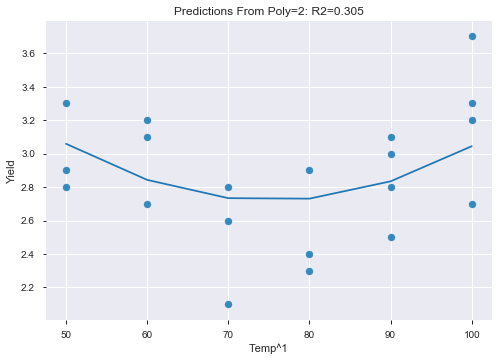

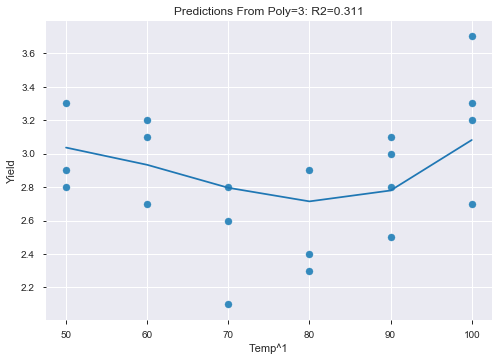

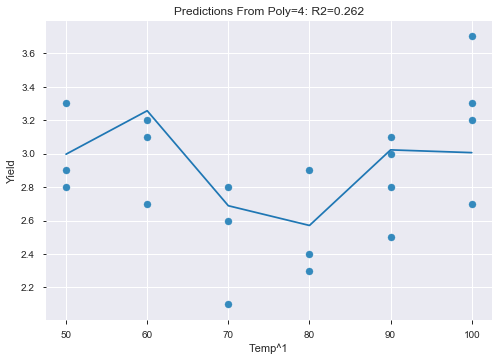

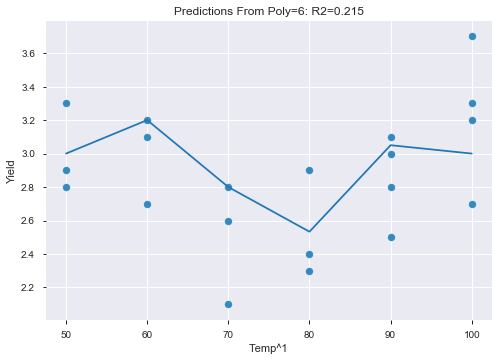

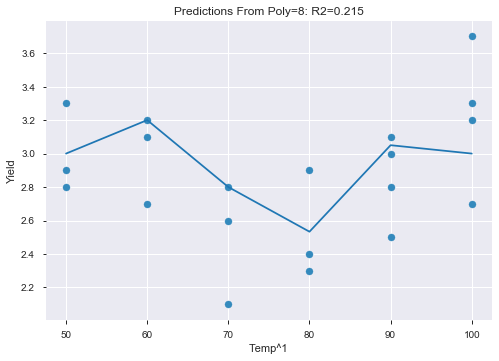

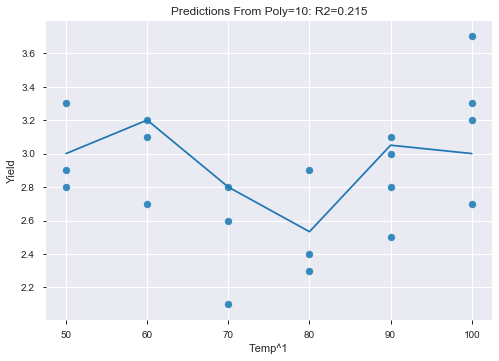

In [68]:
n_polys = [2,3,4,6,8,10]
for n in n_polys:
    kws = dict(n_poly=n)
    df_poly = get_poly_features(df,**kws)
    res = model_poly_data(df_poly,**kws)
    

For more general (multiple variables):

$$ \large \hat{y} = \beta_{0,0} + \sum_{i=0}^{N} \beta_{1,i} x_1^i + \sum_{i=0}^{N} \beta_{2,i} x_2^i + ... + \sum_{i=0}^{N} \beta_{M,i} x_M^i$$ 

$$ \large \hat{y} = \sum_{i=0}^{N}\sum_{j=0}^{M} \beta_{j,i} x_j^i $$ 


# Bias-Variance Trade Off

## Underfitting and Overfitting

> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png" width=50%>


- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*


- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/bias_variance_optimize.png">


> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.




# END OF S.G. CELLS:

In [69]:
stop

NameError: name 'stop' is not defined

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [ ]:
target='price'
print(cat_cols)
print(num_cols)
# print(ixn_cols)

In [ ]:
# for ixn_cols

In [ ]:
y = df[target].copy()

X = df.drop(columns=[*cat_cols,target])

display(X.head(),y.head())

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)

X = poly.fit_transform(X)
print(X.shape)
X[:10]

In [ ]:
# import statsmodels.api as sm
# # X_int = sm.add_constant(X)
# model = sm.OLS(y,X).fit()
# model.summary()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()

reg.fit(X,y)
r2 =r2_score(y, reg.predict(X))
print(r2)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(X[:,1],y)
ax.set(xlabel=col,ylabel=target)
# ax.plot(X,reg.predict(X),color='red')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = 'price'
col='LSTAT'
exp = 4

y = df[target].copy()
X = df[[col]].copy()

#     df_poly = pd.concat([X,y],axis=1)
reg = LinearRegression()
reg.fit(X,y)
r2 =r2_score(y, reg.predict(X))
print(r2)

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set(xlabel=col,ylabel=target)
ax.plot(X,reg.predict(X),color='red')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = 'price'
col_list=['lat']
exp = 4
for col in col_list:
    
    y = df[target].copy()
    X = df[[col]].copy()
    
#     df_poly = pd.concat([X,y],axis=1)
    reg = LinearRegression()
    reg.fit(X,y)
    r2 =r2_score(y, reg.predict(X))
    print(r2)
    
    fig,ax = plt.subplots()
    ax.scatter(X,y)
    ax.set(xlabel=col,ylabel=target)
    ax.plot(X,reg.predict(X),color='red')
    plt.show()
    
    
    
    y = df[target].copy()
    X = df[[col]].copy()

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(exp)
    X = poly.fit_transform(X)
    reg = LinearRegression()
    
    reg.fit(X,y)
    r2 =r2_score(y, reg.predict(X))
    print(r2)
    
    fig,ax = plt.subplots()
    ax.scatter(df[[col]],y)
    ax.set(xlabel=col,ylabel=target)
    ax.plot(df[[col]],reg.predict(X),color='red')
    plt.show()
    
#     exp_col =f"{col}_{exp}" 
#     df_poly[exp_col] = df_poly[col]**exp

# #     make_ols_f(df_poly,target=target,cat_cols=[],col_list=[col])


    
#     plt.figure()
#     df_poly.plot(kind='scatter',x=exp_col,y=target)
#     make_ols_f(df_poly,target=target,cat_cols=[],col_list=[exp_col])

In [ ]:
target = 'price'
# col_list=['lat']
col=col_list[0]
exp=3

df_poly = df[[col,target]].copy()

exp_col =f"{col}_{exp}" 
df_poly[exp_col] = df_poly[col]**exp

make_ols_f(df_poly,target=target,cat_cols=[],col_list=[col])
plt.figure()
df_poly.plot(kind='scatter',x=col,y=target)
plt.show()


In [ ]:

# plt.figure()
# df_poly.plot(kind='scatter',x=exp_col,y=target)
# make_ols_f(df_poly,target=target,cat_cols=[],col_list=[exp_col])

In [ ]:
# for (col1,col2) in multi_cols:
#     if col1 != col2:
#         fig,ax = plt.subplots(ncols=3,figsize=(10,4))
#         sns.regplot(data=df,x=col1,y='price',ax=ax[0])
#         sns.regplot(data=df,x=col2,y='price',ax=ax[1])
#         sns.scatterplot(data=df,x=col1,y=col2,ax=ax[2])
# #         ax[2].set(ylim=df[col2]())
#         plt.tight_layout()
#         plt.show()
#         del fig